<a href="https://colab.research.google.com/github/Divyanshu-ISM/Oil-and-Gas-data-analysis/blob/master/ReservoirSimulation_1D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1-D Block Centered Grid Based Reservoir Simulation

divyanshu vyas | dvyas13ad@gmail.com

Courtsey - T. Ertekin, Abou Kassem et al.

![Block-Centered Grid System](https://drive.google.com/uc?export=view&id=1jda8xs-TCi5NRMHunxsGFOi2Gzm4v_QH)



## BOUNDARY CONDITIONS - No flow boundaries.

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [59]:
#Initialization

# Pi = 6000

dx = 1000
dy = 1000
dz = 75

B = 1 #RB/STB
c = 3.5*(10**(-6)) #psi-1

kx = 15 #mD
phi= 0.18

mu = 10 #cp

dt = 10 #days

#Well Block index wb

wb = 3 # 0,1,2,3 (block 4)

In [60]:
#Calclulation

Ax = dy*dz #ft2

Vb = dx*dy*dz #ft3

qsc_wb = -150 #stb/d

Tx = (0.001127)*(kx)*(Ax)/(mu*B*dx)

M = 5.615*B*dt/Vb/phi/c


In [30]:
#Creating a grid-block skeleton using numpy arrays.

# P = np.ones(5)

# P

array([1., 1., 1., 1., 1.])

In [31]:
#Initial Pressure in all Grid blocks - 
#Initial Time step means n=0

# P_resp= []

# P = P*6000 #psi

# P_resp.append(P)


Note that the space index varies from [0,5) as per python Nomenclature. 

Time steps vary from t = 0 days to t = 360 days.

In [77]:
t = np.arange(0,370,dt)
# t
len(t)

37

In [32]:
# P_resp

[array([6000., 6000., 6000., 6000., 6000.])]

In [26]:
# | 0 | 1 | 2 | 3^ | 4 | ..... where 3^ means there's a production well in block index 3.

In [62]:
# P = np.ones(5)
# P = P*6000 #psi

# #For n = 1 ie at the end of 10 days 

# qsc_0124 = 0
# qsc_3 = -150

# #GridBlock 0
# P[0] = P[0] + M*qsc_0124 + M*(Tx*(P[1]-P[0]))

# #Gridblock 1
# P[1] = P[1] + M*qsc_0124 + M*( Tx*(P[0] - P[1]) + Tx*(P[2] - P[1]) )

# #Gridblock 2
# P[2] = P[2] + M*qsc_0124 + M*( Tx*(P[1] - P[2]) + Tx*(P[3] - P[2]) )

# #GridBlock 4
# P[4] = P[4] + M*qsc_0124 + M*(Tx*(P[3]-P[4]))

# #Gridblock 3
# P[3] = P[3] + M*qsc_3 + M*( Tx*(P[2] - P[3]) + Tx*(P[4] - P[3]) )





# #So, when you do this step by step, seperately. Always execute and calculate 
# # the well block at the end.

# #So this same procedure we can conduct for the entire time domain.

In [63]:
# P = np.ones(5)
# P = P*6000 #psi

# P_resp= []

# P_resp.append(P)

In [65]:
# P

In [66]:
# list(range(len(P)))
# list(range(1,len(P)-1))

In [67]:
# P

In [71]:
P = np.ones(5)
P = P*6000 #psi
P

array([6000., 6000., 6000., 6000., 6000.])

In [74]:
# M*Tx

0.1506691666666667

In [88]:
P_r = np.zeros((37,5))

In [89]:
P_r[0] = np.ones(5)*6000

P_r

array([[6000., 6000., 6000., 6000., 6000.],
       [   0.,    0.,    0.,    0.,    0.],
       [   0.,    0.,    0.,    0.,    0.],
       [   0.,    0.,    0.,    0.,    0.],
       [   0.,    0.,    0.,    0.,    0.],
       [   0.,    0.,    0.,    0.,    0.],
       [   0.,    0.,    0.,    0.,    0.],
       [   0.,    0.,    0.,    0.,    0.],
       [   0.,    0.,    0.,    0.,    0.],
       [   0.,    0.,    0.,    0.,    0.],
       [   0.,    0.,    0.,    0.,    0.],
       [   0.,    0.,    0.,    0.,    0.],
       [   0.,    0.,    0.,    0.,    0.],
       [   0.,    0.,    0.,    0.,    0.],
       [   0.,    0.,    0.,    0.,    0.],
       [   0.,    0.,    0.,    0.,    0.],
       [   0.,    0.,    0.,    0.,    0.],
       [   0.,    0.,    0.,    0.,    0.],
       [   0.,    0.,    0.,    0.,    0.],
       [   0.,    0.,    0.,    0.,    0.],
       [   0.,    0.,    0.,    0.,    0.],
       [   0.,    0.,    0.,    0.,    0.],
       [   0.,    0.,    0.,    

In [91]:
# P_r[4,4]

0.0

In [92]:
# P = np.ones(5)
# P_o = P*6000 #psi

wb = 3 #can ask user input as well.
qsc = np.array([0,0,0,-150,0])
# T = np.array([0,Tx,Tx,Tx,Tx,0])





for j in range(1,len(t)):
  
  # P[0] = P[0] + M*qsc[0] + M*(Tx*(P[1] - P[0]))
  # P[-1] = P[-1] + M*qsc[-1] + M*(Tx*(P[-2] - P[-1]))

  for i in range(1, len(P)-1):
    P_r[j,i] = P_r[j-1,i] + M*qsc[i] + M*(Tx*(P_r[j-1,i-1] - P_r[j-1,i]) + Tx*(P_r[j-1,i+1] - P_r[j-1,i]))
  
  
  P_r[j,0] = P_r[j-1,0] +  M*qsc[0] + M*(Tx*(P_r[j-1,1] - P_r[j-1,0]))
  P_r[j,-1]= P_r[j-1,-1] +  M*qsc[-1] + M*(Tx*(P_r[j-1,-2] - P_r[j-1,-1]))

  

  
  # P[0] = P[0] + M*qsc[0] + M*(Tx*(P[1] - P[0]))
  # P[] = P[-1] + M*qsc[-1] + M*(Tx*(P[-2] - P[-1]))

  # P_resp.append(P)

    

    








In [94]:
P_response = pd.DataFrame(P_r)

In [96]:
temp = P_response.copy()

In [99]:
temp['Time(days)'] = t

In [102]:
temp = temp.drop('Time',axis=1)

In [105]:
temp.columns = ['0' , '1' , '2' , '3' , '4' , 'Time(days)']

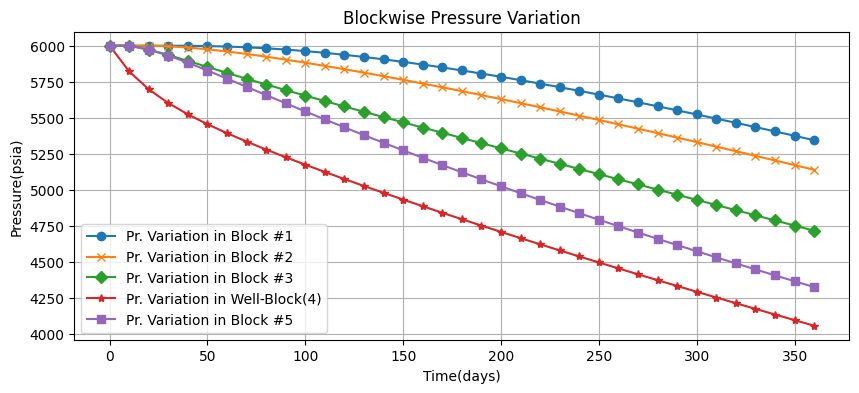

In [112]:
plt.style.use('default')

# plt.title('Blockwise Pressure Variation')

plt.figure(figsize=(10,4))

plt.plot(temp['Time(days)'],temp['0'], label = 'Pr. Variation in Block #1',marker='o')
plt.plot(temp['Time(days)'],temp['1'], label = 'Pr. Variation in Block #2',marker='x')
plt.plot(temp['Time(days)'],temp['2'], label = 'Pr. Variation in Block #3',marker='D')
plt.plot(temp['Time(days)'],temp['3'], label = 'Pr. Variation in Well-Block(4)',marker='*')
plt.plot(temp['Time(days)'],temp['4'], label = 'Pr. Variation in Block #5',marker='s')


plt.xlabel('Time(days)')
plt.ylabel('Pressure(psia)')
plt.title('Blockwise Pressure Variation')


plt.legend(loc='best')
plt.grid()